# Toffoli Gate: $CCNOT$ or $CCX$

Also known as the controlled controlled not gate, this gate operates on 3 qubits instead of 2.
<br>
The $CCX$ gate conditionally flips the target qubit if both control qubits are $\ket{1}$.

$
CCNOT = 
\begin{bmatrix}
1&0&0&0&0&0&0&0\cr
0&1&0&0&0&0&0&0\cr
0&0&1&0&0&0&0&0\cr
0&0&0&1&0&0&0&0\cr
0&0&0&0&1&0&0&0\cr
0&0&0&0&0&1&0&0\cr
0&0&0&0&0&0&0&1\cr
0&0&0&0&0&0&1&0\cr
\end{bmatrix}
$

For example, where the second and third qubits are our control qubits...
<br>
<br>
$
CCNOT\ket{000}
=\begin{bmatrix}
1&0&0&0&0&0&0&0\cr
0&1&0&0&0&0&0&0\cr
0&0&1&0&0&0&0&0\cr
0&0&0&1&0&0&0&0\cr
0&0&0&0&1&0&0&0\cr
0&0&0&0&0&1&0&0\cr
0&0&0&0&0&0&0&1\cr
0&0&0&0&0&0&1&0\cr
\end{bmatrix}
\begin{bmatrix}
1\cr 0\cr 0\cr 0\cr 0\cr 0\cr 0\cr  0\cr 
\end{bmatrix}
=\begin{bmatrix}
1\cr 0\cr 0\cr 0\cr 0\cr 0\cr 0\cr  0\cr
\end{bmatrix}
=\ket{000}
$
<br>
<br>
The matrix remains unchanged and the same result will happen for these operations as well since both control qubits are not $\ket{1}$...
<br>
<br>
$
CCNOT\ket{001},
CCNOT\ket{010},
CCNOT\ket{100},
CCNOT\ket{011},
CCNOT\ket{101}
$
<br>
<br>
But wehn we do $CCNOT\ket{110}$ or $CCNOT\ket{111}$, our state will change...
<br>
<br>
$
CCNOT\ket{110}
=\begin{bmatrix}
1&0&0&0&0&0&0&0\cr
0&1&0&0&0&0&0&0\cr
0&0&1&0&0&0&0&0\cr
0&0&0&1&0&0&0&0\cr
0&0&0&0&1&0&0&0\cr
0&0&0&0&0&1&0&0\cr
0&0&0&0&0&0&0&1\cr
0&0&0&0&0&0&1&0\cr
\end{bmatrix}
\begin{bmatrix}
0\cr 0\cr 0\cr 0\cr 0\cr 0\cr 1\cr  0\cr 
\end{bmatrix}
=\begin{bmatrix}
0\cr 0\cr 0\cr 0\cr 0\cr 0\cr 0\cr  1\cr 
\end{bmatrix}
=\ket{111}
$
<br>
<br>
$
CCNOT\ket{111}
=\begin{bmatrix}
1&0&0&0&0&0&0&0\cr
0&1&0&0&0&0&0&0\cr
0&0&1&0&0&0&0&0\cr
0&0&0&1&0&0&0&0\cr
0&0&0&0&1&0&0&0\cr
0&0&0&0&0&1&0&0\cr
0&0&0&0&0&0&0&1\cr
0&0&0&0&0&0&1&0\cr
\end{bmatrix}
\begin{bmatrix}
0\cr 0\cr 0\cr 0\cr 0\cr 0\cr 0\cr  1\cr 
\end{bmatrix}
=\begin{bmatrix}
0\cr 0\cr 0\cr 0\cr 0\cr 0\cr 1\cr  0\cr 
\end{bmatrix}
=\ket{110}
$

Regardless of wether or not the target qubit is flipped, the control qubits will always remain the same.
<br>
Additionally, applying the CCX gate twice will reverse it's effects because it is it's own inverse. 

## $CCX$ Gate in Qiskit

In [114]:
from qiskit import *
from qiskit_aer import * 
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from math import pi
%matplotlib inline

### $CCX\ket{000}$
with first and second qubits as control, and third as target

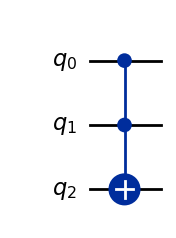

In [115]:
circuit = QuantumCircuit(3)
circuit.ccx(0, 1, 2)
circuit.draw(output='mpl');

In [116]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector}=")

<IPython.core.display.Latex object>

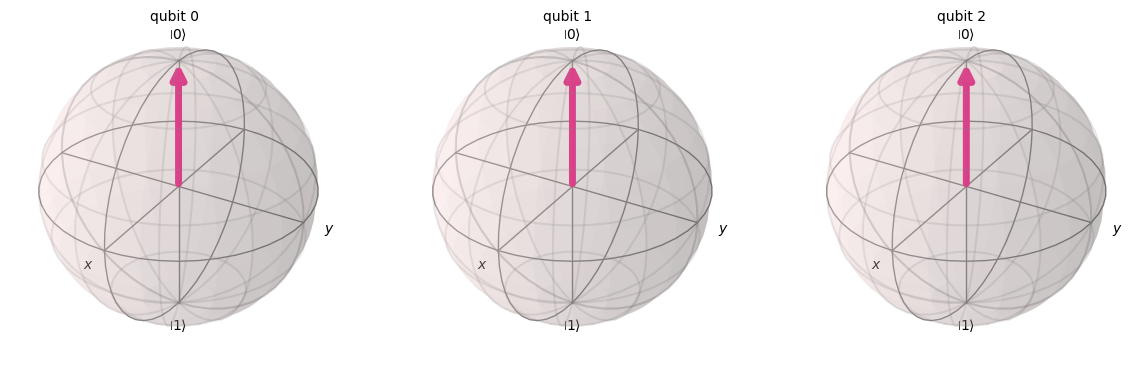

In [117]:
plot_bloch_multivector(statevector);

### $CCX\ket{001}$
with first and second qubits as control, and third as target

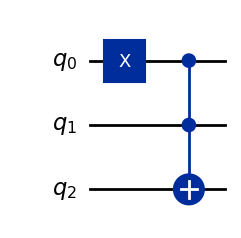

In [118]:
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.ccx(0, 1, 2)
circuit.draw(output='mpl');

In [119]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector}=")

<IPython.core.display.Latex object>

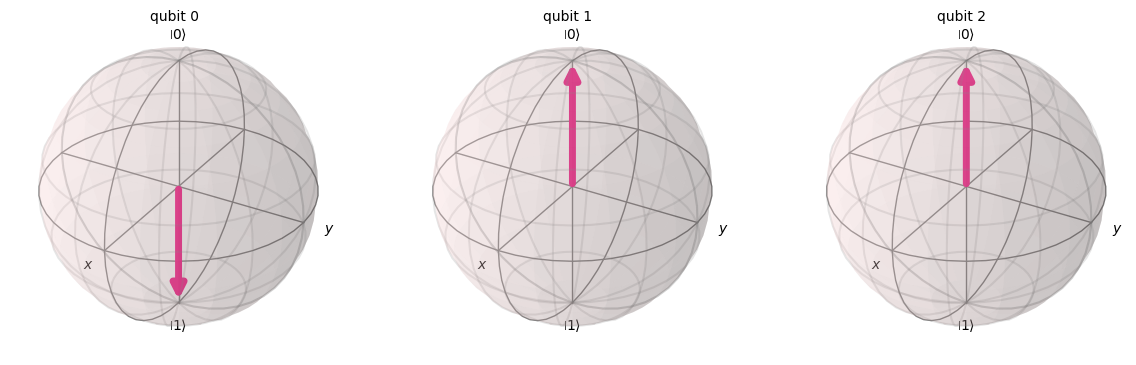

In [120]:
plot_bloch_multivector(statevector);

### $CCX\ket{011}$
with first and second qubits as control, and third as target

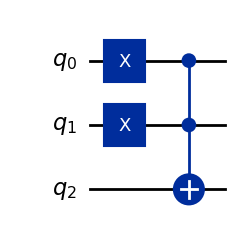

In [121]:
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.x(1)
circuit.ccx(0, 1, 2)
circuit.draw(output='mpl');

In [122]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector}=")

<IPython.core.display.Latex object>

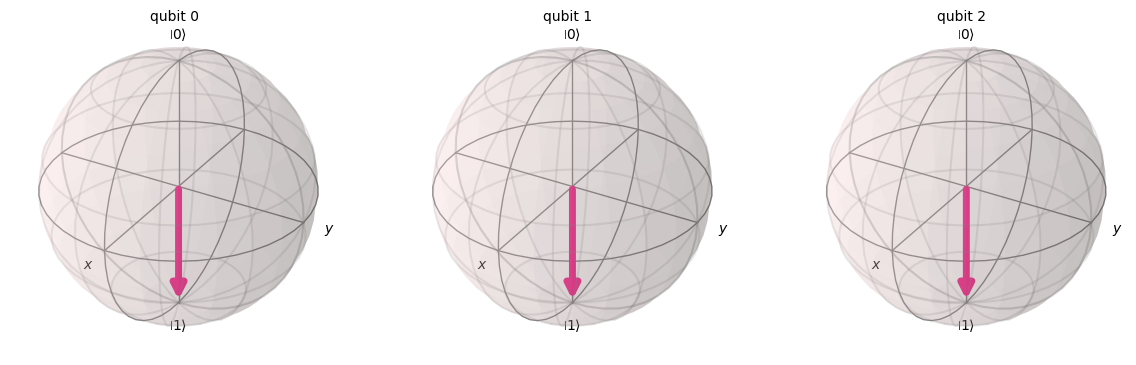

In [123]:
plot_bloch_multivector(statevector);

So what axis is our gate rotating the third qubit around?
<br>
Let's visualize this by initializing our target qubit with an $R_X$ with rotation of $\frac{\pi}{3}$ and removing the $CCX$ gate.

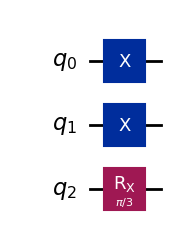

In [124]:
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.x(1)
circuit.rx(pi/3, 2)
circuit.draw(output='mpl');

In [125]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector}=")

<IPython.core.display.Latex object>

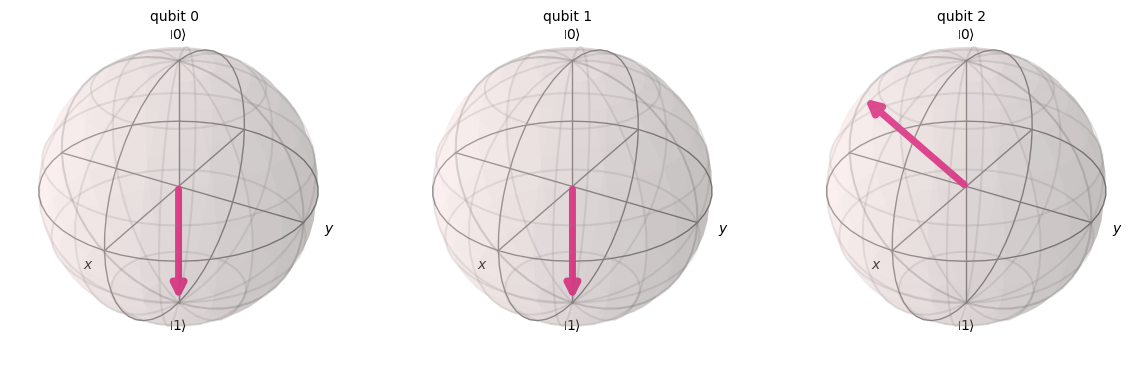

In [126]:
plot_bloch_multivector(statevector);

Now let's run the same quantum circuit with a CCX gate on the second qubit to see where the vector rotates to. 

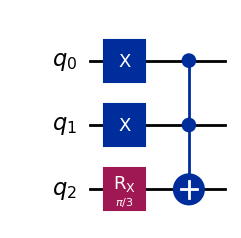

In [127]:
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.x(1)
circuit.rx(pi/3, 2)
circuit.ccx(0, 1, 2)
circuit.draw(output='mpl');

In [128]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector}=")

<IPython.core.display.Latex object>

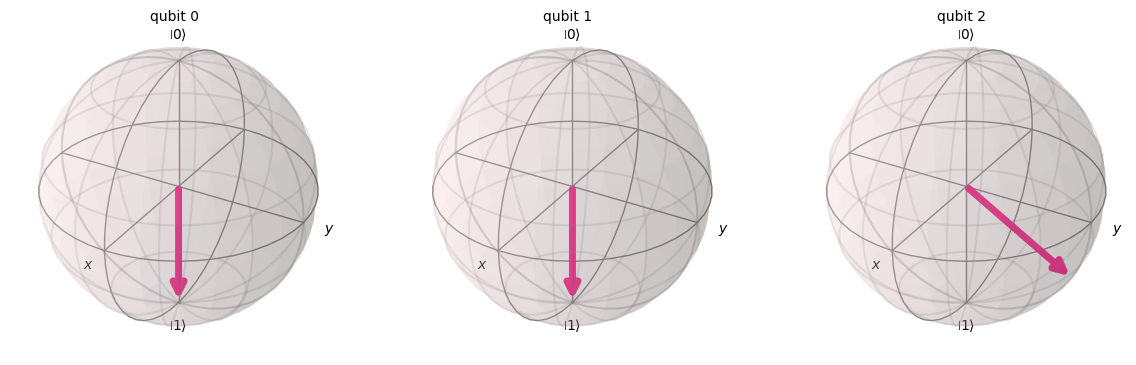

In [129]:
plot_bloch_multivector(statevector);

It rotated $\pi$ radians around the x-axis!